# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [140]:
import pandas as pd
customers = pd.read_csv("mallcustomers.csv")
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [141]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [142]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

In [143]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\hamin\AppData\Local\Temp\ipykernel_30316\3179275314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Gender', y='Income', palette='colorblind')


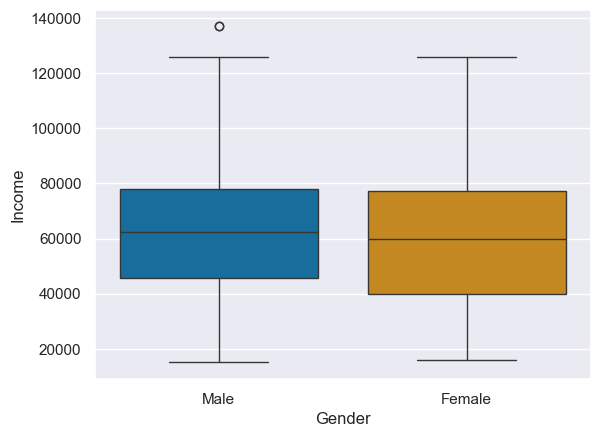

In [144]:
sns.boxplot(data=customers, x='Gender', y='Income', palette='colorblind')
plt.show()

C:\Users\hamin\AppData\Local\Temp\ipykernel_30316\848721636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Gender', y='Age', palette='colorblind')


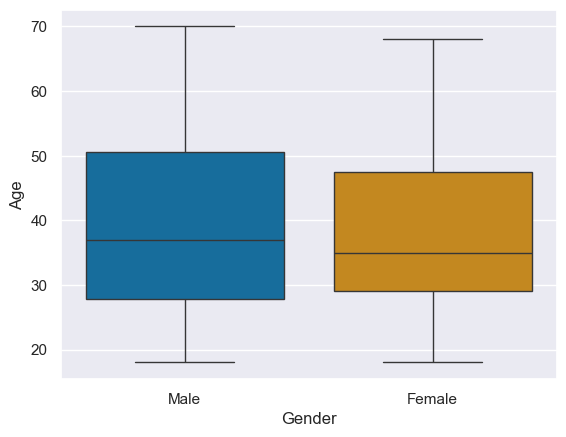

In [145]:
sns.boxplot(data=customers, x='Gender', y='Age', palette='colorblind')
plt.show()

C:\Users\hamin\AppData\Local\Temp\ipykernel_30316\3899936256.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Gender', y='SpendingScore', palette='colorblind')


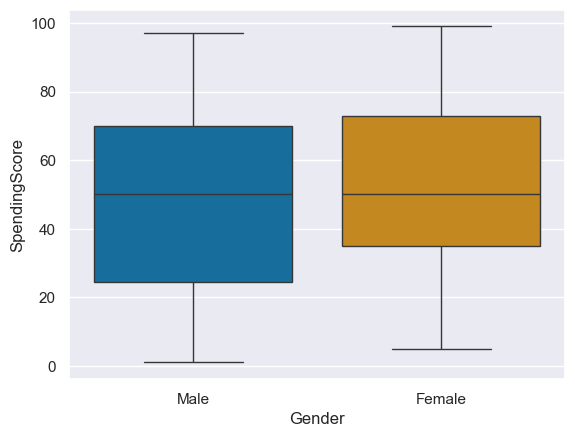

In [146]:
sns.boxplot(data=customers, x='Gender', y='SpendingScore', palette='colorblind')
plt.show()

Text(0.5, 1.0, 'Relationship Between Age and Income of Customers')

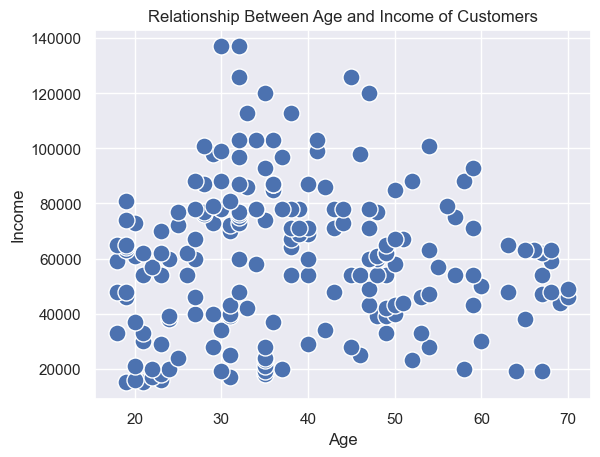

In [147]:
ax = sns.scatterplot(data = customers, x = 'Age', y = 'Income',s = 150)
plt.title('Relationship Between Age and Income of Customers')

Text(0.5, 1.0, 'Relationship Between Age and Spending Score of Customers')

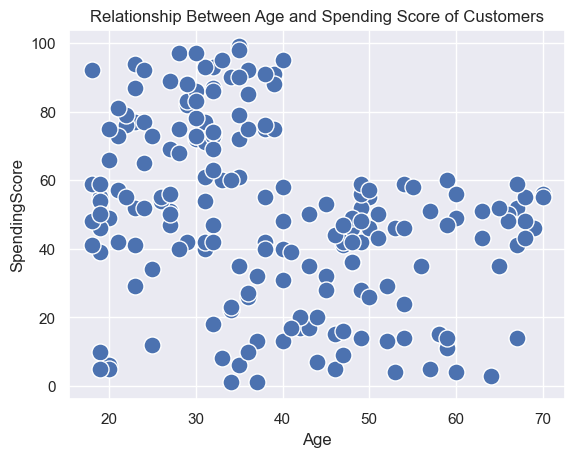

In [148]:
ax = sns.scatterplot(data = customers, x = 'Age', y = 'SpendingScore', s = 150)
plt.title('Relationship Between Age and Spending Score of Customers')

Text(0.5, 1.0, 'Relationship Between Income and Spending Score of Customers')

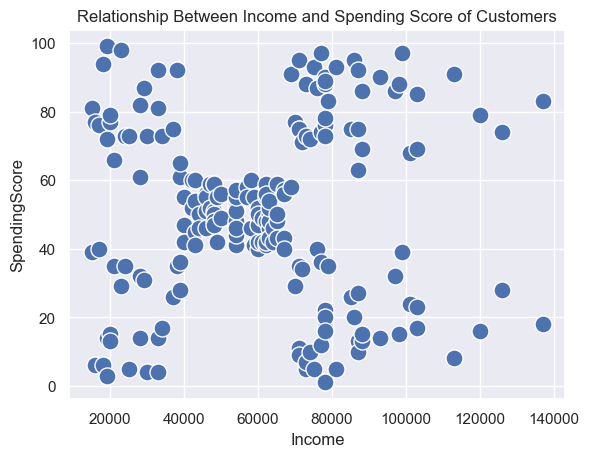

In [149]:
ax = sns.scatterplot(data = customers, x = 'Income', y = 'SpendingScore', s = 150)
plt.title('Relationship Between Income and Spending Score of Customers')

## 3. Preprocessing the Data for k-Means Clustering

In [189]:
# Selecting relevant features
customer_features = customers[['Income', 'SpendingScore']]
customer_features.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [190]:
from sklearn.preprocessing import StandardScaler

# Standardizing the Income and SpendingScore columns
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Converting the scaled array back to a DataFrame for convenience
customer_features_scaled = pd.DataFrame(customer_features_scaled, columns=['Income', 'SpendingScore'])
customer_features_scaled.describe().round(2)


,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


## 4. Determining the Optimal Number of Clusters

The Elbow Method (Within-Cluster Sum of Squares)

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_

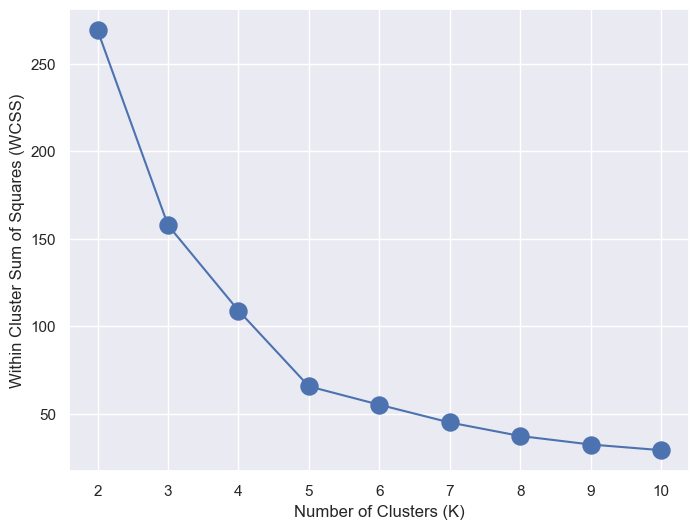

In [183]:
from sklearn.cluster import KMeans
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customer_features_scaled)
    wcss.append(km.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 11), y=wcss)
plt.scatter(x=range(2, 11), y=wcss, s=150)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

Average Silhouette Method

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_

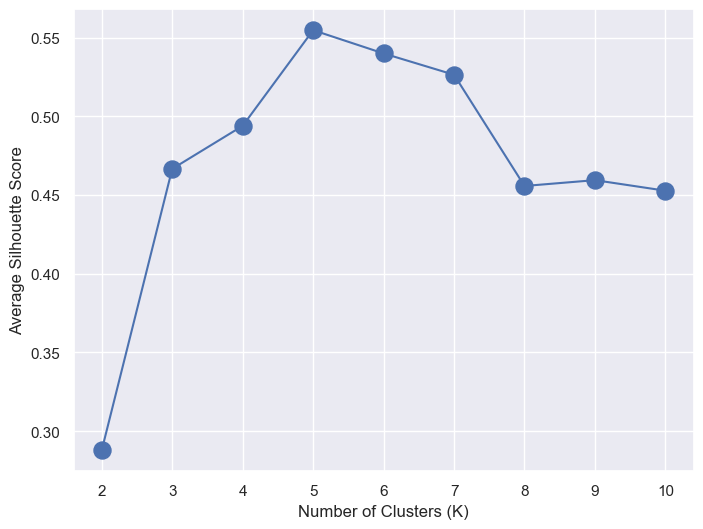

In [185]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customer_features_scaled)
    score = silhouette_score(customer_features_scaled, km.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette scores
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores)
plt.scatter(x=range(2, 11), y=silhouette_scores, s=150)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.show()

Calinski-Harabasz Score

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_

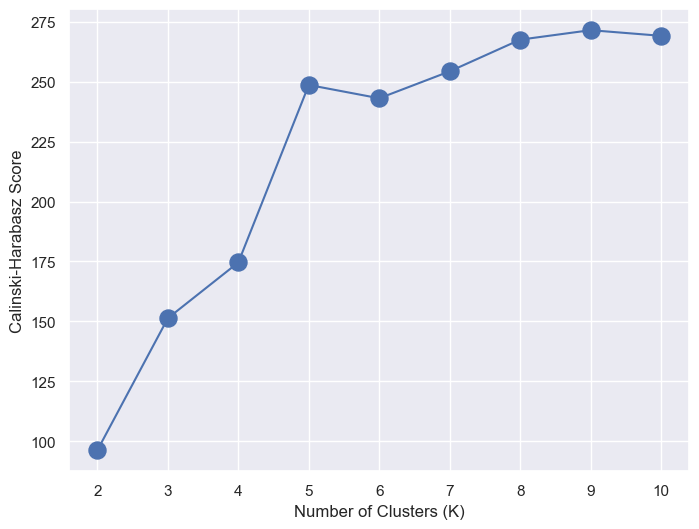

In [186]:
from sklearn.metrics import calinski_harabasz_score
calinski_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customer_features_scaled)
    score = calinski_harabasz_score(customer_features_scaled, km.labels_)
    calinski_scores.append(score)

# Plotting Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 11), y=calinski_scores)
plt.scatter(x=range(2, 11), y=calinski_scores, s=150)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

All three methods suggest that 5 clusters offer the best balance of compactness and separation, making it an ideal number for our data segmentation.

## 5. Applying K-Means Clustering

In [187]:
from sklearn.cluster import KMeans

# Initialize K-Means with K=5 clusters
km = KMeans(n_clusters=5, n_init=25, random_state=1234)

In [188]:
# Fit the model to the data
km.fit(customer_features_scaled)

# Get cluster assignments for each customer (total within-cluster sum of squares or WCSS)
km.labels_

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [191]:
# Access the coordinates of cluster centroids
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])

# Get the inertia value for the clustering
km.inertia_

65.56840815571681

## 6. Analyze and Interpret the Clusters

In [198]:
cluster_sizes = pd.Series(km.labels_).value_counts()
cluster_sizes

4    81
1    39
3    35
0    23
2    22
Name: count, dtype: int64

In [202]:
# Getting cluster centroids
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-0.200913,-0.026456


C:\Users\hamin\AppData\Local\Temp\ipykernel_30316\2898886387.py:4: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x=customer_features_scaled['Income'], y=customer_features_scaled['SpendingScore'],


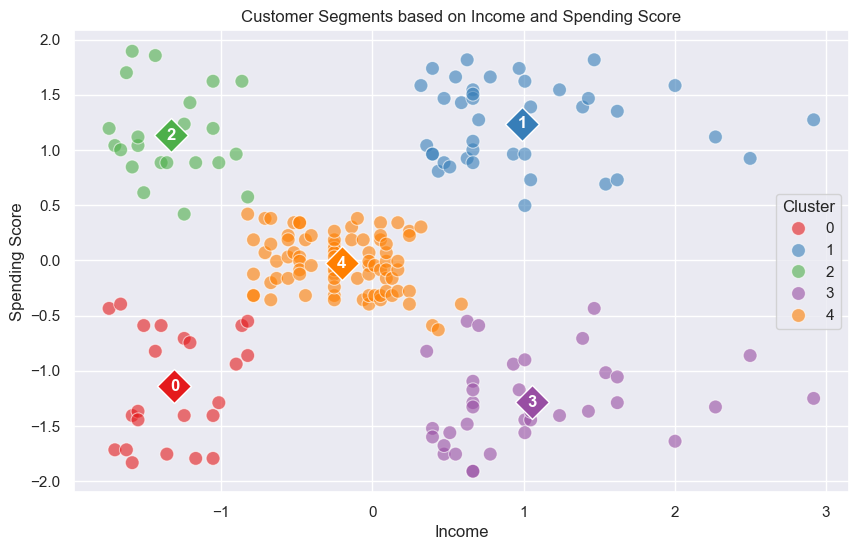

In [201]:
# Scatter plot of clusters with centroids
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set1", as_cmap=False)  # Get the color palette used by seaborn
sns.scatterplot(x=customer_features_scaled['Income'], y=customer_features_scaled['SpendingScore'],
                hue=km.labels_, palette=palette, s=100, alpha=0.6)

# Plot centroids with matching colors
for i, (x, y) in enumerate(zip(cluster_centers['Income'], cluster_centers['SpendingScore'])):
    plt.scatter(x, y, color=palette[i], marker='D', s=300, edgecolor='white')
    plt.text(x, y, str(i), color='white', fontsize=12, ha='center', va='center', fontweight='bold')

plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title="Cluster")
plt.title("Customer Segments based on Income and Spending Score")
plt.show()

In [168]:
# Assign cluster labels to each customer
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,2
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,2
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,2


In [169]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,False,True
1,2,21,15000,81,2,False,True
2,3,20,16000,6,0,True,False
3,4,23,16000,77,2,True,False
4,5,31,17000,40,0,True,False
5,6,22,17000,76,2,True,False
6,7,35,18000,6,0,True,False
7,8,23,18000,94,2,True,False
8,9,64,19000,3,0,False,True
9,10,30,19000,72,2,True,False


In [203]:
# Calculate overall summary statistics
overall_summary = customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)
overall_summary

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [138]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0
